In [1]:
import sys
import datetime
sys.path.insert(0, '/home/istvan/Desktop/sus-behav-mon/storing_logs/')
import add_logs_to_database
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [2]:
df_main =  pd.DataFrame(add_logs_to_database.get_main_log_collection())
df_network = pd.DataFrame(add_logs_to_database.get_network_log_collection())
df = pd.concat([df_main, df_network], ignore_index=True)

In [3]:
df.drop(["_id", "index"], axis=1, inplace = True)

In [4]:
df_copy = df.copy()

In [5]:
df['date'] = [d.date() for d in df['timestamp']]
df['time'] = [d.time() for d in df['timestamp']]
df["ttime"] = [datetime.datetime.combine(datetime.date.today(), t) for t in df["time"]]

In [6]:
df[["hostname", "appname"]].value_counts()


hostname                  appname             
istvan-HP-ProBook-650-G1  NetworkManager          2665
                          avahi-daemon            1436
                          kernel                  1133
                          systemd                  932
                          rtkit-daemon             327
                                                  ... 
                          gnome-keyring-daemon       1
                          geoclue                    1
                          cracklib                   1
                          accounts-daemon            1
raspberrypi               systemd-timesyncd          1
Name: count, Length: 86, dtype: int64

In [29]:
df['Counts'] = df.groupby(["hostname", "appname"])['time'].transform('count')

In [37]:
df.head()

,timestamp,hostname,appname,pid,message,date,time,ttime,Counts
0,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,systemd,1,rsyslog.service: Sent signal SIGHUP to main pr...,2023-07-16,12:08:58,2023-07-19 12:08:58,623
1,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,systemd,1,logrotate.service: Deactivated successfully.,2023-07-16,12:08:58,2023-07-19 12:08:58,623
2,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,systemd,1,Finished Rotate log files.,2023-07-16,12:08:58,2023-07-19 12:08:58,623
3,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,systemd,1,Started Samba Winbind Daemon.,2023-07-16,12:08:58,2023-07-19 12:08:58,623
4,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,wpa_supplicant,888,dbus: fill_dict_with_properties dbus_interface...,2023-07-16,12:08:58,2023-07-19 12:08:58,54


In [41]:
df.ttime.apply(lambda x: x.date())

0       2023-07-19
1       2023-07-19
2       2023-07-19
3       2023-07-19
4       2023-07-19
           ...    
1736    2023-07-19
1737    2023-07-19
1738    2023-07-19
1739    2023-07-19
1740    2023-07-19
Name: ttime, Length: 1741, dtype: object

In [ ]:
# 1. Subset the data for desired time frame (8 - 12)
# 2. Do groupby


In [40]:
df[(df.hostname == "istvan-HP-ProBook-650-G1") & (df.appname == "systemd")]

,timestamp,hostname,appname,pid,message,date,time,ttime
0,2023-07-30 00:00:03,istvan-HP-ProBook-650-G1,systemd,1,logrotate.service: Deactivated successfully.,2023-07-30,00:00:03,2023-07-30 00:00:03
1,2023-07-30 00:00:03,istvan-HP-ProBook-650-G1,systemd,1,Finished Rotate log files.,2023-07-30,00:00:03,2023-07-30 00:00:03
84,2023-07-30 00:09:14,istvan-HP-ProBook-650-G1,systemd,1,Starting Fingerprint Authentication Daemon...,2023-07-30,00:09:14,2023-07-30 00:09:14
86,2023-07-30 00:09:14,istvan-HP-ProBook-650-G1,systemd,1,Started Fingerprint Authentication Daemon.,2023-07-30,00:09:14,2023-07-30 00:09:14
107,2023-07-30 00:09:28,istvan-HP-ProBook-650-G1,systemd,1659,app-gnome-google\x2dchrome-3375.scope: Consume...,2023-07-30,00:09:28,2023-07-30 00:09:28
...,...,...,...,...,...,...,...,...
6787,2023-07-30 18:24:05,istvan-HP-ProBook-650-G1,systemd,1,Started MongoDB Database Server.,2023-07-30,18:24:05,2023-07-30 18:24:05
6866,2023-07-30 18:30:33,istvan-HP-ProBook-650-G1,systemd,1,Started Run anacron jobs.,2023-07-30,18:30:33,2023-07-30 18:30:33
6869,2023-07-30 18:30:33,istvan-HP-ProBook-650-G1,systemd,1,anacron.service: Deactivated successfully.,2023-07-30,18:30:33,2023-07-30 18:30:33
7486,2023-07-30 19:33:33,istvan-HP-ProBook-650-G1,systemd,1,Started Run anacron jobs.,2023-07-30,19:33:33,2023-07-30 19:33:33


In [52]:
hostnames = df["hostname"].unique()
print(hostnames)
appnames = df["appname"].unique()
print(appnames)

['istvan-HP-ProBook-650-G1' 'raspberrypi']
['systemd' 'update-notifier' 'rtkit-daemon' 'NetworkManager'
 'avahi-daemon' 'dbus-daemon' 'gnome-shell'
 'ubuntu-appindicators@ubuntu.com' 'nautilus' 'kernel' 'bluetoothd'
 'ModemManager' 'systemd-modules-load' 'systemd-udevd' 'mtp-probe'
 'systemd-fsck' 'apparmor.systemd' 'systemd-resolved' 'snapd-apparmor'
 'anacron' 'cron' 'apport' 'udisksd' 'rsyslogd' 'wpa_supplicant'
 'thermald' 'polkitd' 'accounts-daemon' 'networkd-dispatcher' 'acpid'
 'snapd' 'gnome-session' 'gnome-session-binary' 'tracker-miner-f'
 'snapd-desktop-integration.snapd-desktop-integration' 'goa-daemon'
 '/usr/libexec/gdm-wayland-session' 'org.gnome.Shell.desktop' 'PackageKit'
 'gsd-sharing' 'spice-vdagent' 'xbrlapi.desktop' 'gsd-media-keys'
 'systemd-timesyncd' 'whoopsie' 'geoclue' 'cracklib' 'CRON' 'pulseaudio'
 'gnome-keyring-daemon' 'sh' 'gnome-keyring-ssh.desktop'
 'gnome-keyring-secrets.desktop' 'gnome-keyring-pkcs11.desktop'
 'snapd-desktop-i' 'at-spi-dbus-bus.deskto

In [105]:
## COOOOOOLIO
def hist_maker(host, app):
    
    my_df = df[(df.hostname == host) & (df.appname == app)]
    total_sum = my_df["time"].apply(lambda x: x.hour).value_counts().sum()

    normalised = (my_df["time"].apply(lambda x: x.hour).value_counts()/total_sum)

    normal_dict = normalised.to_dict()

    for i in range(0, 25):
        if i not in normal_dict:
            normal_dict[i] = 0
    """
    (all incl.)
    
    Morning: 0-5 
    Beforenoon: 6-11
    Afternooon: 12-17
    Evening: 17-23
    """
    
    normal_dict["morning"] = sum([normal_dict.get(i) for i in normal_dict if type(i) is int and i < 6])
    normal_dict["beforenoon"] = sum([normal_dict.get(i) for i in normal_dict if type(i) is int and i < 12 and i >= 6])
    normal_dict["afternoon"] = sum([normal_dict.get(i) for i in normal_dict if type(i) is int and i < 18 and i >= 12])
    normal_dict["evening"] = sum([normal_dict.get(i) for i in normal_dict if type(i) is int and i < 24 and i >= 18])
    
    return normal_dict
    

print(hist_maker("istvan-HP-ProBook-650-G1", "systemd"))

{12: 0.4613733905579399, 13: 0.315450643776824, 0: 0.11695278969957082, 17: 0.06437768240343347, 18: 0.019313304721030045, 15: 0.009656652360515022, 14: 0.008583690987124463, 16: 0.002145922746781116, 19: 0.002145922746781116, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 'morning': 0.11695278969957082, 'beforenoon': 0, 'afternoon': 0.861587982832618, 'evening': 0.021459227467811162}


In [106]:
d = {}
for host in hostnames:
    for app in appnames:
        d[(host, app)] = hist_maker(host, app)
d['istvan-HP-ProBook-650-G1', 'NetworkManager']

{18: 0.15609756097560976,
 12: 0.14709193245778612,
 17: 0.1324577861163227,
 14: 0.12082551594746717,
 16: 0.1200750469043152,
 13: 0.10544090056285178,
 15: 0.1050656660412758,
 19: 0.0975609756097561,
 0: 0.015384615384615385,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 'morning': 0.015384615384615385,
 'beforenoon': 0,
 'afternoon': 0.7309568480300187,
 'evening': 0.25365853658536586}

In [77]:
pd.Series(d).rename_axis(["Hostname", "Appname"]).reset_index(name="Times")

,Hostname,Appname,Times
0,istvan-HP-ProBook-650-G1,systemd,"{12: 0.4613733905579399, 13: 0.315450643776824..."
1,istvan-HP-ProBook-650-G1,update-notifier,"{0: 0.5, 14: 0.5, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0..."
2,istvan-HP-ProBook-650-G1,rtkit-daemon,"{16: 0.29357798165137616, 15: 0.25688073394495..."
3,istvan-HP-ProBook-650-G1,NetworkManager,"{18: 0.15609756097560976, 12: 0.14709193245778..."
4,istvan-HP-ProBook-650-G1,avahi-daemon,"{12: 0.14763231197771587, 14: 0.13370473537604..."
...,...,...,...
155,raspberrypi,sshd,"{13: 0.5, 12: 0.5, 0: 0, 1: 0, 2: 0, 3: 0, 4: ..."
156,raspberrypi,polkitd(authority=local),"{13: 1.0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, ..."
157,raspberrypi,lightdm,"{13: 1.0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, ..."
158,raspberrypi,dhcpcd,"{13: 1.0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, ..."


In [59]:
df["norm_counts"] = (df["Counts"]/len(df.index))

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [18]:
df.head()

,timestamp,hostname,appname,pid,message,date,time,ttime,Counts,norm_counts
0,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,systemd,1,rsyslog.service: Sent signal SIGHUP to main pr...,2023-07-16,12:08:58,2023-07-19 12:08:58,623,0.357840
1,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,systemd,1,logrotate.service: Deactivated successfully.,2023-07-16,12:08:58,2023-07-19 12:08:58,623,0.357840
2,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,systemd,1,Finished Rotate log files.,2023-07-16,12:08:58,2023-07-19 12:08:58,623,0.357840
3,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,systemd,1,Started Samba Winbind Daemon.,2023-07-16,12:08:58,2023-07-19 12:08:58,623,0.357840
4,2023-07-16 12:08:58,istvan-HP-ProBook-650-G1,wpa_supplicant,888,dbus: fill_dict_with_properties dbus_interface...,2023-07-16,12:08:58,2023-07-19 12:08:58,54,0.031017


In [16]:
len(df.index)

1741

In [19]:
df.groupby(["hostname", "appname"])["norm_counts"].sum()

hostname                  appname                         
istvan-HP-ProBook-650-G1  /usr/libexec/gdm-wayland-session     0.253303
                          CRON                                 0.229753
                          ModemManager                         0.002298
                          NetworkManager                       5.516370
                          PackageKit                           0.082711
                                                                ...    
raspberrypi               sshd                                 0.009190
                          sudo                                 0.057438
                          systemd                             10.468122
                          systemd-logind                       0.000574
                          systemd-timesyncd                    0.000574
Name: norm_counts, Length: 68, dtype: float64

TypeError: int() argument must be a string, a bytes-like object or a real number, not 'datetime.time'

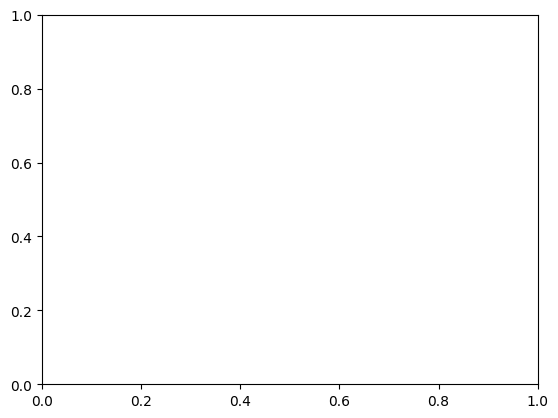

In [29]:
fig, ax = plt.subplots()
df["timestamp"].astype(np.int64).plot.hist(ax=ax)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)

In [ ]:
df.groupby(["appname", "hostname"]).sum()

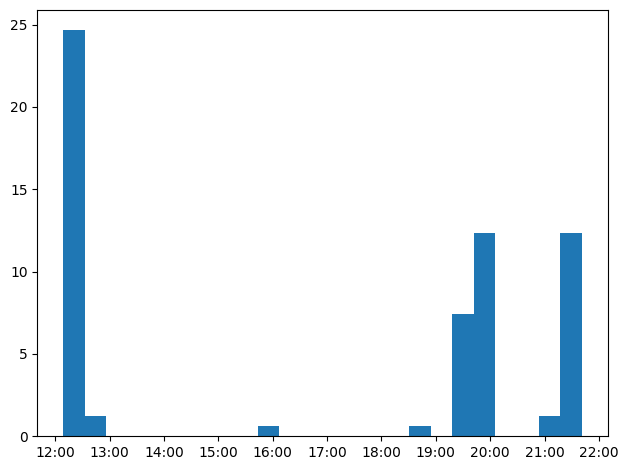

In [15]:
fig, ax = plt.subplots()
my_array = df.loc[(df["appname"] == "NetworkManager") & (df["hostname"] =="istvan-HP-ProBook-650-G1"), "ttime"]
# sns.histplot(data=df,x="timestamp" )
# ax.plot(df["timestamp"], df["Counts"])
n, bins, rectangles = ax.hist(my_array, bins=24, density=True)
fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(fmt)
# ax.set_xticks([i for i in range(24)])
# ax.set_xticklabels(df["time"], rotation=30, ha='right')
# ax.set_ylim([0, 5])
fig.tight_layout()

/home/istvan/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


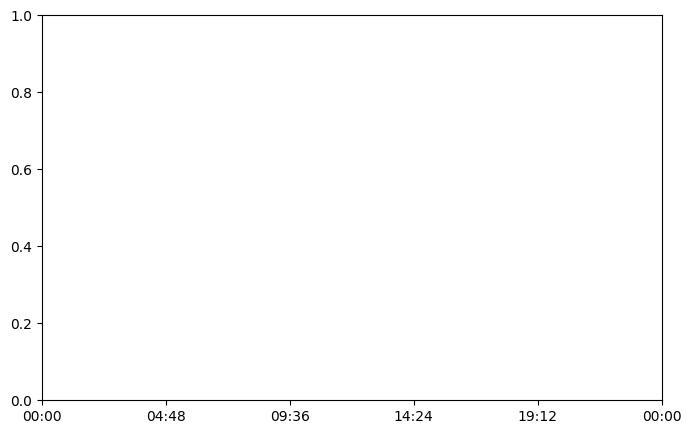

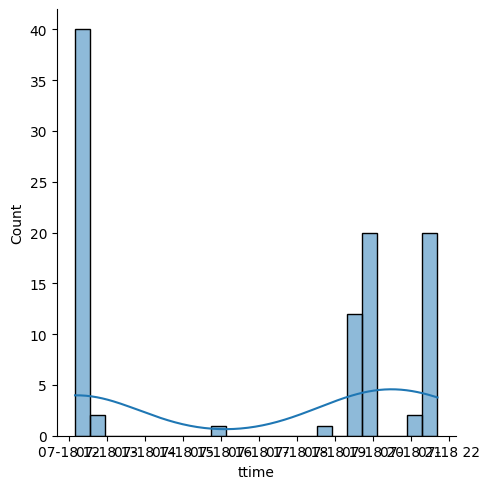

In [68]:
fig, ax = plt.subplots(figsize=(8, 5))  
sns.displot(my_array, bins=24, kde=True)
fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(fmt)

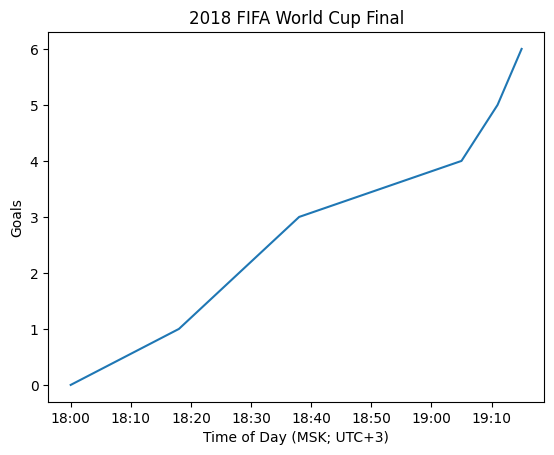

In [32]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

goals = [0, 1, 2, 3, 4, 5, 6]
times = [
    datetime.time(18, 0), datetime.time(18, 18), datetime.time(18, 28),
    datetime.time(18, 38), datetime.time(19, 5), datetime.time(19, 11),
    datetime.time(19, 15)
]

ax = plt.axes()
# Convert datetime.time objects into datetime.datetime objects by adding a date
# to the time
datetimes = [datetime.datetime.combine(datetime.date.today(), t) for t in times]
ax.plot(datetimes, goals)
ax.set_title('2018 FIFA World Cup Final')
ax.set_ylabel('Goals')
ax.set_xlabel('Time of Day (MSK; UTC+3)')
# Re-format the x-axis
fmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(fmt)

plt.show()